In [1]:
import numpy as np

In [2]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("train.data")
test_data,test_label=load_data("test.data")
print(train_data,train_label)
print(test_data,test_label)

[[0.     0.64   0.64   ... 0.3756 0.61   0.278 ]
 [0.06   0.     0.71   ... 0.9821 4.85   2.259 ]
 [0.     0.     0.     ... 0.3537 0.4    0.191 ]
 ...
 [0.3    0.     0.3    ... 0.1404 0.06   0.118 ]
 [0.96   0.     0.     ... 0.1147 0.05   0.078 ]
 [0.     0.     0.65   ... 0.125  0.05   0.04  ]] ['1' '1' '1' ... '0' '0' '0']
[[0.21   0.28   0.5    ... 0.5114 1.01   1.028 ]
 [0.     0.     0.     ... 0.3537 0.4    0.191 ]
 [0.     0.69   0.34   ... 0.3728 0.61   0.261 ]
 ...
 [0.     0.     0.     ... 0.1    0.01   0.006 ]
 [0.     0.     0.     ... 0.1727 0.05   0.019 ]
 [0.     0.     1.19   ... 0.1    0.01   0.024 ]] ['1' '1' '1' ... '0' '0' '0']


In [3]:
len(test_data[1])

57

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
model=Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(57,)))
model.add(Dropout(0.2))
model.add(Dense(28, activation='softmax'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history=model.fit(train_data,
                    train_label,
                    epochs=60,
                    batch_size=100,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/60
3224/3224 [==============================] - 1s 198us/step - loss: 0.7001 - acc: 0.4110 - val_loss: 0.6920 - val_acc: 0.5185
Epoch 2/60
3224/3224 [==============================] - 0s 22us/step - loss: 0.6859 - acc: 0.6014 - val_loss: 0.6791 - val_acc: 0.6057
Epoch 3/60
3224/3224 [==============================] - 0s 21us/step - loss: 0.6729 - acc: 0.6067 - val_loss: 0.6633 - val_acc: 0.6057
Epoch 4/60
3224/3224 [==============================] - 0s 21us/step - loss: 0.6548 - acc: 0.6079 - val_loss: 0.6398 - val_acc: 0.6057
Epoch 5/60
3224/3224 [==============================] - 0s 23us/step - loss: 0.6310 - acc: 0.6259 - val_loss: 0.6110 - val_acc: 0.6354
Epoch 6/60
3224/3224 [==============================] - 0s 18us/step - loss: 0.6051 - acc: 0.7019 - val_loss: 0.5817 - val_acc: 0.7712
Epoch 7/60
3224/3224 [==============================] - 0s 17us/step - loss: 0.5776 - acc: 0.7866 - val_loss: 0.5540 - val_acc: 0.8519
Epoch 

In [8]:
import matplotlib.pyplot as plt

In [9]:
history_dict=history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

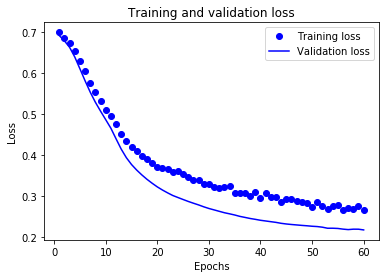

In [10]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

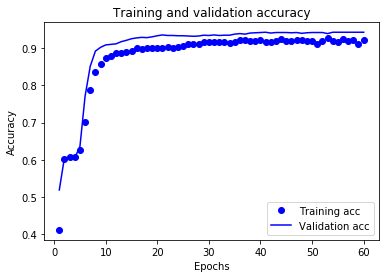

In [11]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data("get_the_flag.data")

In [15]:
predictions = model.predict(prediction_data)

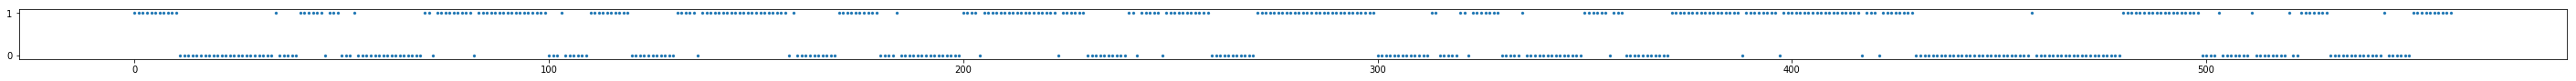

In [16]:
data_show=[]
for i in predictions:
    if i[0]<0.5:
        data_show.append(0)
    else:
        data_show.append(1)
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()